In [4]:
import pandas as pd
import sqlite3

In [5]:
connect=sqlite3.connect('../data/checking-logs.sqlite', check_same_thread=False)

In [6]:
df=pd.io.sql.read_sql('select * from pageviews where uid not like "admin_%" ', connect, parse_dates=['datetime'])
df

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [7]:
views=df.groupby(df['datetime'].dt.date).agg({'uid':['count']})
views=views.reset_index()
views.columns=['datetime', 'views']
views.head()

,datetime,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


In [8]:
status=pd.io.sql.read_sql('select * from checker where uid not like "admin_%" ', connect, parse_dates=['timestamp'])
status

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [9]:
check=status.groupby(status['timestamp'].dt.date).agg({'uid':['count']})
check=check.reset_index()
check.columns=['datetime', 'commit']
check.head()

,datetime,commit
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25


In [10]:
view_commit=pd.merge(left=views, right=check, on='datetime', how='inner')  #только те где есть и просмотры и коммиты
view_commit.head()

,datetime,views,commit
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28


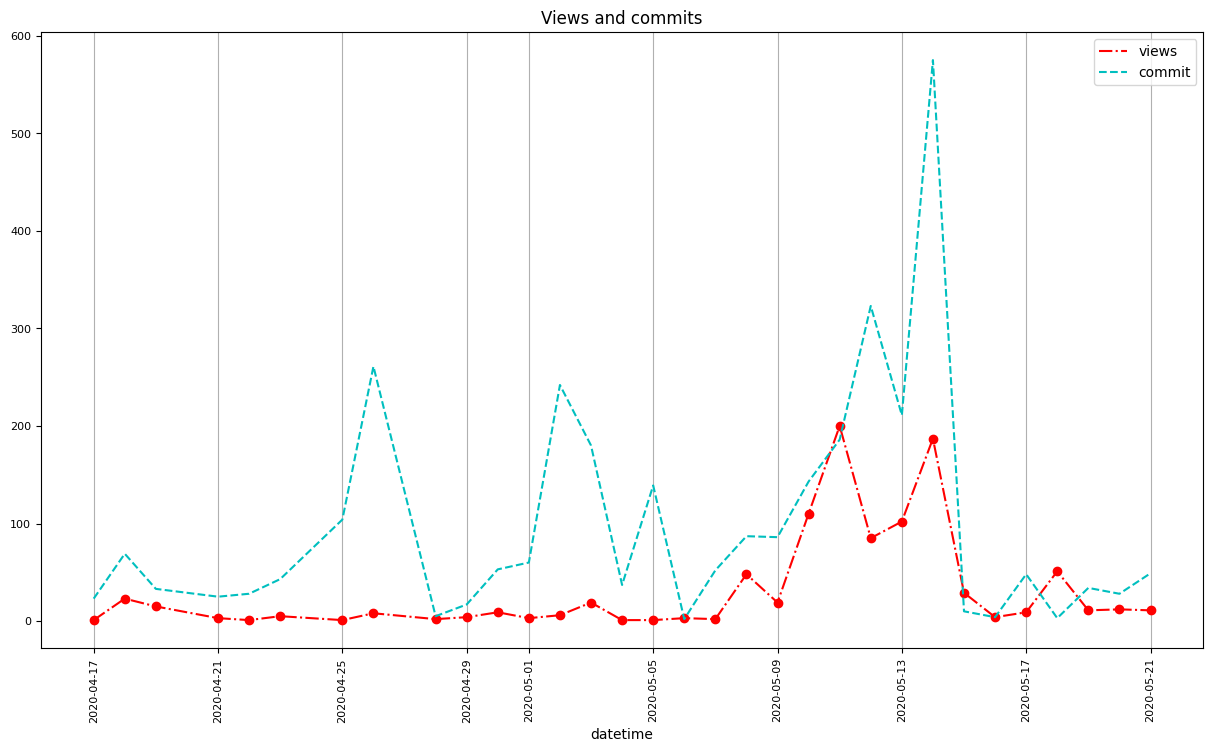

In [11]:
plot_v=view_commit.plot(kind='line', x='datetime', y=['views','commit'], fontsize=8, figsize=(15,8), title='Views and commits', rot=90,color=['r', 'c'], style=['-.','--'])
plot_v.get_lines()[0].set_marker('o')
plot_v.grid(axis='x')

## How many times was the number of views larger than 150?

In [12]:
answer=view_commit[view_commit['views']>150]['views'].count()

In [15]:
print(f'The answer is {answer} times')

The answer is 2 times


In [16]:
connect.close()